**Importing pandas to read the data**


**Importing matplotlib and seaborn to plot the data**

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reading data using pandas**

In [25]:
data = pd.read_csv('Customer_Behaviour.csv')
# Printing the dataframe to see the data in the file 
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**As values of the Gender column is in the form of Strings so we need to use LabelEncoder to convert the string data to numerical data**

In [26]:
# importing the library for label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# fit_transform() method is used to encode the data in the dataframe 
# and return the encoded data in the dataframe
data['Encoded_Gender'] = le.fit_transform(data['Gender'])

**Printing the data information**

In [27]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   Encoded_Gender   400 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 17.3+ KB


**Plot bar graph of each of the properties of the data using the missingno package**

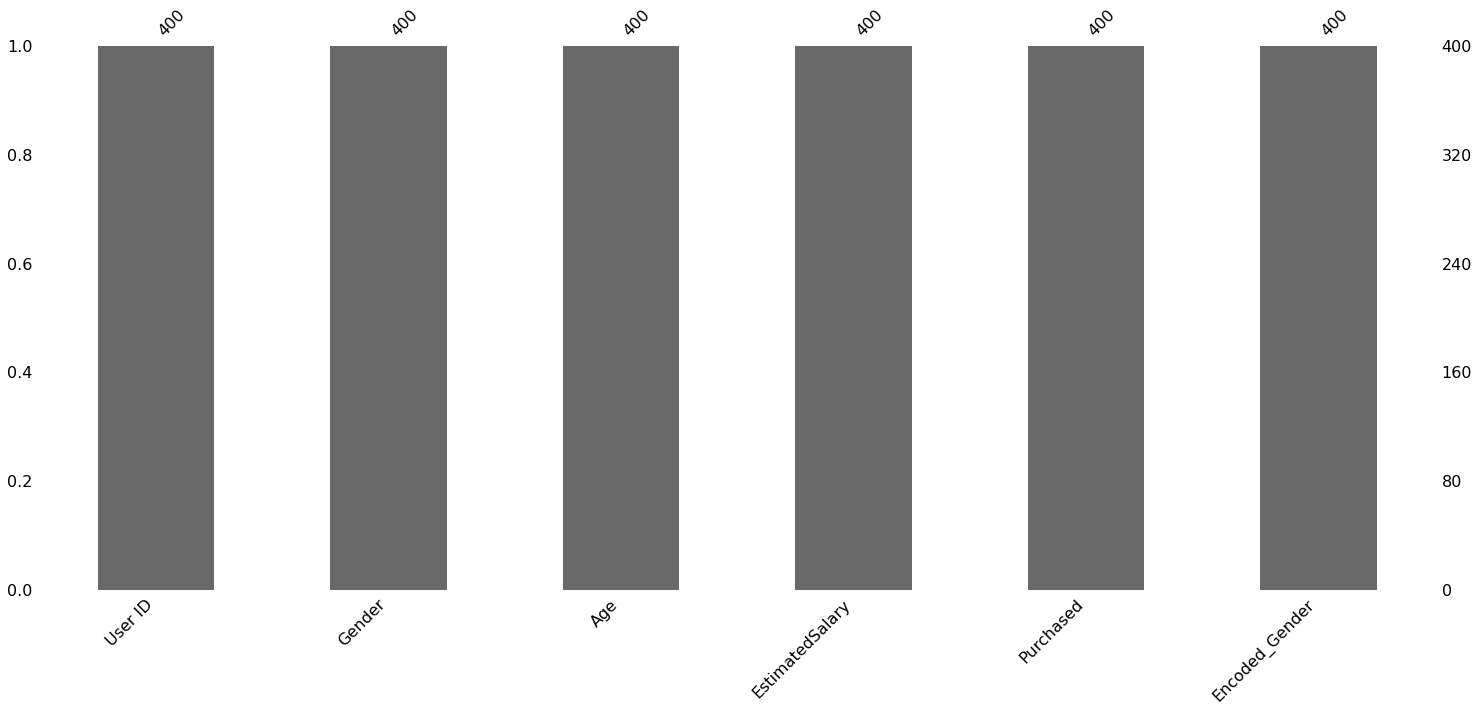

In [28]:
import missingno as msno
null_count_plot = msno.bar(data)

# **COMMENT on above plot :-** 

We can see out of 400 rows which are available all the columns as 400 values so no NaN values are there in the dataset

**Plotting the histogram of the data**

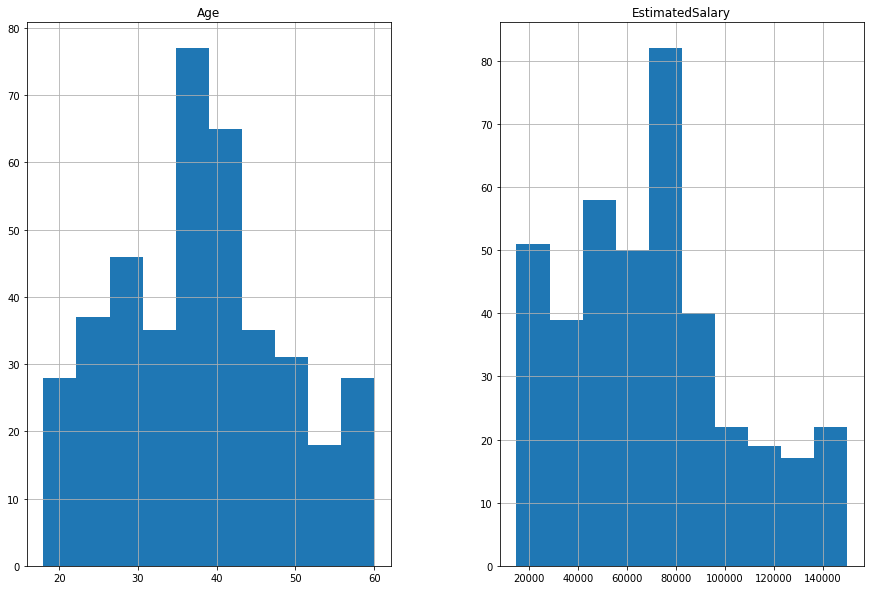

In [29]:
distribution_plot = data[['Age','EstimatedSalary']].hist(figsize = (15,10))

**Splitting the data for training and testing pahse using train_test_split function of sklearn**

test_size = 0.2 it means that 20% will be used for testing and 80% will be used for training i.e, out of 100 samples, 20 sample will be used for testing and 80 sample will be used for training

In [30]:
from sklearn.model_selection import train_test_split
features = data[['Encoded_Gender','Age','EstimatedSalary']]
label = data['Purchased']
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=42)

**Using sklearn inbuilt function KNeighborsClassifier and predicting the values**

In [31]:
#Primarly taking the k value as 3 and predicting the value for [0,19,21000]
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3 )
model.fit(x_train,y_train)
predicted = model.predict([[0,19,21000]])
print("Purchased " if predicted else "Not purchased" )

Not purchased


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Now we need to find the optimal value for k so that we can use KNN perfectly**


**Taking k from 1 to 20 and finding the accuracy**

In [34]:
# importing the accuracy_score from the sklearn library for calculating the accuracy score for various k values for the model
from sklearn.metrics import accuracy_score
accuracy_scores = []
for k in range(1,20):
  predicted_vals =  model.predict(x_test)
  accuracy = accuracy_score(y_test, predicted_vals)
  accuracy_scores.append(accuracy)
  print(f"For k = {k} The accuracy of the model is :- {accuracy}")


For k = 1 The accuracy of the model is :- 0.8
For k = 2 The accuracy of the model is :- 0.8
For k = 3 The accuracy of the model is :- 0.8
For k = 4 The accuracy of the model is :- 0.8
For k = 5 The accuracy of the model is :- 0.8
For k = 6 The accuracy of the model is :- 0.8
For k = 7 The accuracy of the model is :- 0.8
For k = 8 The accuracy of the model is :- 0.8
For k = 9 The accuracy of the model is :- 0.8
For k = 10 The accuracy of the model is :- 0.8
For k = 11 The accuracy of the model is :- 0.8
For k = 12 The accuracy of the model is :- 0.8
For k = 13 The accuracy of the model is :- 0.8
For k = 14 The accuracy of the model is :- 0.8
For k = 15 The accuracy of the model is :- 0.8
For k = 16 The accuracy of the model is :- 0.8
For k = 17 The accuracy of the model is :- 0.8
For k = 18 The accuracy of the model is :- 0.8
For k = 19 The accuracy of the model is :- 0.8


# **COMMENT ON THE ABOVE OUTPUT :-**

**Suprisingly accuracy for any K value for this particular dataset is same so we can use any k value as all are giving same accuracy of 80 %**

C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


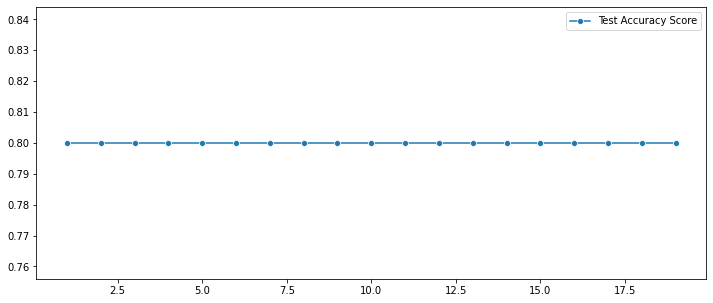

In [33]:
# Plotting the accuracy score for the model for various k values
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),accuracy_scores,marker='o',label='Test Accuracy Score')